In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 20px; }</style>"))

Пусть $x$ и $y$ -- случайные величины с конечным вторым моментом. <br>
Тогда их скалярное произведение это $\langle x, y \rangle = \mathbb{E}\, x \cdot y$.

$x_1, \ldots, x_n$ - последовательноть случайных величин <br>
$z = z(x_1, \ldots, x_n) $ -- случайая величина зависящая от них

Для $i = 1, \ldots, n$ положим $z_i = z_i(x_1, \ldots, x_i) = \mathbb{E}_{x_{i + 1}, \ldots x_n}\left[z(x_1, \ldots, x_n)|x_1, \ldots, x_i\right]$
<br>
Заметим, что при $i < j$ выполнено $z_i = \mathbb{E}_{x_{i + 1}, \ldots, x_{j}} \left[ z_j|x_1, \ldots, x_i \right]$
<br>
Таким образом последовательность $z_1, \ldots, z_n$ образует мартингал.

Пусть $\Delta_i = z_i - z_{i - 1}$ (при $i = 2, \ldots, n$), $\Delta_1 = z_1$. Тогда при $i < j$:
$$ \langle z_i, \Delta_j \rangle = \mathbb{E}[z_i \cdot \Delta_j] = \mathbb{E}_{x_1, \ldots, x_n} [z_i \cdot (z_j - z_{j - 1})] = $$
$$ \mathbb{E}_{x_1, \ldots, x_i} \left[ z_i(x_1, \ldots, x_i) \cdot \mathbb{E}_{x_{i + 1}, \ldots, x_n}(z_j - z_{j - 1}) \right] = $$
$$ \mathbb{E}_{x_1, \ldots, x_i} \left[ z_i(x_1, \ldots, x_i) \cdot (z_i - z_i) \right] = 0 $$

Значит $\langle \Delta_i, \Delta_j \rangle = \langle z_i - z_{i - 1}, \Delta_j \rangle = \langle z_i, \Delta_j \rangle - \langle z_{i - 1}, \Delta_j \rangle = 0 - 0 = 0$. <br>
Таким образом все $\Delta_i$ попарно ортогональны. Значит
$$ \mathbb{E} z^2 = \langle z, z \rangle = \langle \Delta_1 + \ldots + \Delta_n, \Delta_1 + \ldots + \Delta_n \rangle = $$
$$ \mathbb{E} \Delta_1^2 + \ldots + \mathbb{E} \Delta_n^2. $$

Пусть $z = y - A(X^l, r, x)$ -- ошибка нашего алгоритма, обученного на выборке $X^l$ с использованием случайных битов $r$, и примененного к тестовому примеру $(x, y)$. <br>
Положим $x_1 = x$, $x_2 = X^l$, $x_3 = r$, $x_4 = y$, получается
* $z_1 = z_1(x) = \mathbb{E}_{X^l, r, y} \left[ y - A(X^l, r, x) \right] = \mathbb{E}\left[y|x \right] - \mathbb{E}_{X^l, r} \left[ A(X^l, r, x) | x\right]$
* $z_2 = z_2(x, X^l) = \mathbb{E}\left[y|x \right] - \mathbb{E}_r \left[ A(X^l, r, x) | x, X^l \right]$
* $z_3 = z_3(x, X^l, r) = \mathbb{E}\left[y|x \right] - A(X^l, r, x)$
* $z_4 = z_4(x, X^l, r, y) = y - A(X^l, r, x)$

* $\Delta_1(x) = z_1(x) = 
\mathbb{E}\left[y|x \right] - \mathbb{E}_{X^l, r} \left[ A(X^l, r, x) | x\right]$
* $\Delta_2(x, X^l) = z_2 - z_1 = 
\mathbb{E}_{X^l, r} \left[ A(X^l, r, x) | x\right] - \mathbb{E}_r \left[ A(X^l, r, x) | x, X^l\right]$
* $\Delta_3(x, X^l, r) = \mathbb{E}_r \left[ A(X^l, r, x) | x, X^l\right] - A(X^l, r, x)$
* $\Delta_4 = \mathbb{E}\left[y|x \right]$

Таким образом:

$$ MSE = \mathbb{E}\left[ \left(y - A(X^l, r, x)\right)^2 \right] = $$
$$
    \underbrace{\mathbb{E}\Delta_1^2}_{bias} +
    \underbrace{\mathbb{E} \Delta_2^2}_{sample~variance} + 
    \underbrace{\mathbb{E} \Delta_3^2}_{randomization~variance} + 
    \underbrace{\mathbb{E} \Delta_4^2}_{noise}
$$

## Смешивание

Пусть $a_i(x)$ предсказание $i$-того алгоритма на объекте $x$ из тестового примера $(x, y)$. 
<br>
Более формально: $a_i(x) = A_i(X^l, r_i, x)$.
<br>
Положим $e_i = y - a_i(x)$, для удобства будем считать что $\mathbb{E} e_i = 0$. <br>
Рассмотрим среднеквадратичную ошибку ансамбля $\bar a(x) = \frac1n \sum_{i = 1}^n a_n(x)$.
$$ \mathbb{E} {\bar e}^2 = 
\mathbb{E} \left(y - \frac1n \sum_{i = 1}^n a_i(x) \right)^2 = 
\mathbb{E} \left(\frac1n \sum_{i = 1}^n y - a_i(x) \right)^2 = 
\mathbb{E} \left(\frac1n \sum_{i = 1}^n e_i \right)^2 = 
$$
$$ \frac1{n^2} \sum_{i, j = 1}^n \mathbb{E}\, e_i \cdot e_j =
\frac1n \left(\frac1n \sum_i \mathbb{E} e_i^2 \right) + \frac1{n^2} \sum_{i \ne j} \mathbb{E}\, e_i \cdot e_j = $$
$$
\frac1n \left[\frac1n \sum_i \mathbb{E} e_i^2 \right] + \frac{n-1}{n} \left[ \frac1{n(n-1)}\sum_{i \ne j} Cov(e_i \cdot e_j)\right] 
$$

А теперь забдлендим алгоритмы $a_1$ и $a_2$ с весами $1 - p$ и $p$. <br>
$$\mathbb{E} \bar e^2 = \mathbb{E} ((1-p)e_1 + pe_2)^2 = $$
$$ (1-p)^2 \mathbb{E} e_1^2 + 2 p(1-p) Cov(e_1, e_2) + p^2 \mathbb{E} e_2^2.$$
Производная этой штуки по $p$ в точке $p = 0$ равна: 
$$ 2\left(Cov(e_1, e_2) - \mathbb{E} e_1^2\right)$$
Т. е. если $Cov(e_1, e_2) < \mathbb{E} e_1^2$ то имеет смысл хотя бы чуть-чуть подблендить $a_2$ к $a_1$. <br>
Даже если ошибка $\mathbb{E} e_2^2$ велика.

Возьмем любой лосс $l(y, \hat y)$ выпуклый по $\hat y$. <br>
Возьмем ансамбль из моделей $a_1, \ldots, a_n$, смешанных с весами из распределения $\mathbf{p} = (p_1,\ldots, p_n)$. <br>
$$\bar a(x) = \mathbb{E}_{i \sim \mathbf{p}} a_i(x) = \sum_{i = 1}^n p_i a_i(x) $$
Лосс смеси равен 
$$
\underbrace{\mathbb{E}_{x, y} l(y, \mathbb{E}_{i \sim \mathbf{p}} a_i(x)) \leqslant 
\mathbb{E}_{x, y} \mathbb{E}_{i \sim \mathbf{p}} l(y, a_i(x))}_{неравенство~Йенсена} =
\sum_{i = 1}^n p_i \mathbb{E}_{x, y} l(y, a_i(x)) $$
Мораль: если лоссы моделей примерно одинаковы, а сами они достаточно разные, то с точки зрения любого выпуклого лосса имеет смысл их смешать.

In [2]:
from scipy.stats import ttest_ind
import numpy as np
from matplotlib import pyplot as plt

In [3]:
treatment_effect = 0.1
noise = 0.2
coef = 24 / (np.pi ** 3)

def generate_xy(sample_size=100):
    x = np.sort(np.random.uniform(-np.pi / 2, np.pi / 2, sample_size))
    y = np.sin(x) + noise * np.random.randn(sample_size)
    return x, y


$$y = f(x) + \varepsilon$$
Где $x$ и $\varepsilon$ независимы, $\mathbb{E}\varepsilon = 0$.
$$ D(y) = D(f(x)) + D(\varepsilon) $$
Положим $y' = y - \hat f(x) = \left(f(x) - \hat f(x)\right) + \varepsilon$
$$ D(y') = D(f(x) - \hat f(x)) + D(\varepsilon) $$


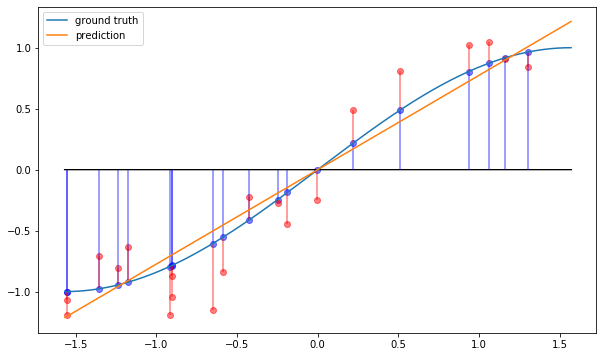

In [4]:

plt.rc("figure", figsize=(10, 6))
plt.arrow(-np.pi / 2, 0, np.pi, 0)

x, y = generate_xy(1000)
plt.plot(x, np.sin(x), label="ground truth")
plt.plot(x, coef * x, label="prediction")

x, y = generate_xy(20)
plt.vlines(x, np.zeros_like(x), np.sin(x), colors="blue", alpha=0.5)
plt.scatter(x, np.sin(x), color="blue", alpha=0.5)

# x, y = generate_xy(10)
plt.vlines(x, np.sin(x), y, colors="red", alpha=0.5)
plt.scatter(x, y, color="red", alpha=0.5)
plt.legend()
plt.show()

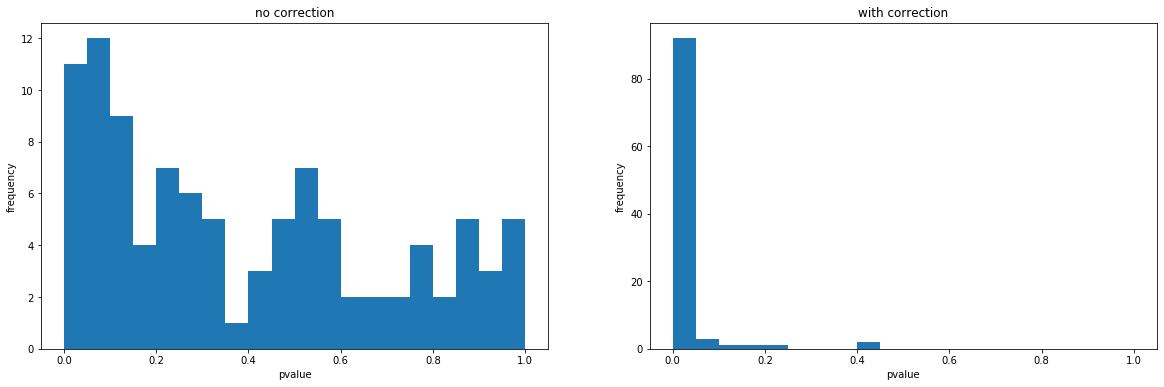

In [5]:
def simulate_experiment(make_adjustment=False):
    x1, y1 = generate_xy()
    x2, y2 = generate_xy()
    y2 += treatment_effect
    if make_adjustment:
        return ttest_ind(y1 - coef * x1, y2 - coef * x2).pvalue
    else:
        return ttest_ind(y1, y2).pvalue

plt.rc("figure", figsize=(20, 6))

plt.subplot(121)
plt.title("no correction")
plt.xlabel("pvalue")
plt.ylabel("frequency")
plt.hist([simulate_experiment() for i in range(100)], bins=np.linspace(0, 1, 21))

plt.subplot(122)
plt.title("with correction")
plt.xlabel("pvalue")
plt.ylabel("frequency")
plt.hist([simulate_experiment(True) for i in range(100)], bins=np.linspace(0, 1, 21))
plt.show()

## Tests

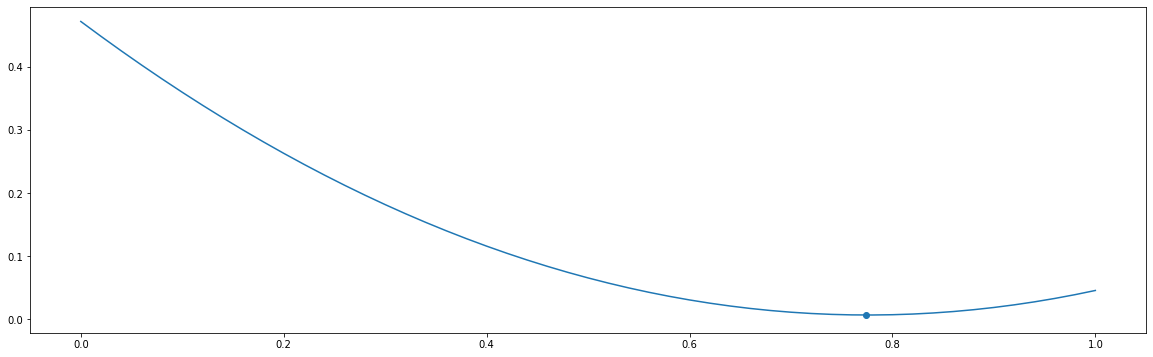

In [6]:


# empirical check of coef optimality
x = np.random.uniform(-np.pi / 2, np.pi / 2, 1000)
y = np.sin(x)
coefs = np.linspace(0, 1, 51)
result = [((y - c * x) ** 2).mean() for c in coefs]
plt.plot(coefs, result)
plt.scatter(coef, ((y - coef * x) ** 2).mean())